# Langgraph

langgraph 基础使用


## 代码示例


In [12]:
! pip install -U langgraph langchain_core

Looking in indexes: https://mirrors.aliyun.com/pypi/simple/

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [13]:
! python --version

Python 3.13.3


### 定义 State


In [14]:
from langchain_core.messages import AnyMessage
from typing import Annotated
from typing_extensions import TypedDict


class State(TypedDict):

    messages: list[AnyMessage]
    extra_file: int

### 添加节点和边


In [15]:
from langchain_core.messages import AIMessage

def node(state: State):
  messages = state['messages']
  new_messages = AIMessage('I am node')
  
  return {
    "messages": messages + [new_messages],
    "extra_file": 1
  }

### 连接节点和边

In [16]:
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


graph_builder = StateGraph(State)
graph_builder.add_node("node", node)
graph_builder.add_edge(START, "node")
graph_builder.add_edge("node", END)

graph = graph_builder.compile()


### 可视化图表

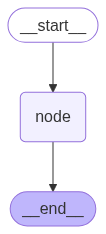

In [22]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

### 调用

In [21]:
from langchain_core.messages import HumanMessage

result = graph.invoke({
  'messages': [HumanMessage('hello, I am Barry.')]
})

# 格式化打印
for message in result['messages']:
  message.pretty_print()

================================ Human Message =================================

hello, I am Barry.
================================== Ai Message ==================================

I am node
